## Creating Repository

In [2]:
import git

# Clone the repository to your local machine
repo = git.Repo.clone_from('https://github.com/brianellis1997/DateAScientist.git', '~/realRepo/DateAScientist2')

In [3]:
import os

# Navigate to the local repository directory
os.chdir('~/realRepo/DateAScientist2')

## Commits

In [240]:
import git

# Navigate to the local repository directory
repo_dir = '~/~/realRepo/DateAScientist2'
repo = git.Repo(repo_dir)

# Stage the changes
repo.git.add('date-a-scientist.ipynb')

# Commit the changes
commit_message = 'Plotted some interesting plots. Still doing EDA'
repo.git.commit('-m', commit_message)

# Push the changes to the remote repository
origin = repo.remote(name='origin')
origin.push()

In [6]:
# Push the changes
repo.git.push()

''

In [183]:
import git

# Navigate to the local repository directory
repo_dir = '~/~/realRepo/DateAScientist2'
repo = git.Repo(repo_dir)

# Pull changes from the remote repository
repo.git.pull()

'Already up to date.'

In [194]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [261]:
profiles = pd.read_csv('~/profiles.csv')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [262]:
profiles.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

In [263]:
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [264]:
# Count of gender
profiles.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

We see there are more males than females

In [265]:
# Lets see the target variable status
profiles.status.value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

Majority are single. Lets see if there is any missing data

In [266]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [267]:
# Diet is one of the most empty columns
profiles.diet.value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly kosher           18
strictly halal            18
kosher                    11
halal                     11
Name: diet, dtype: int64

In [268]:
gender_data = profiles.groupby(['sex']).mean()
gender_data

,age,height,income
sex,,,
f,32.818220,65.103873,11181.697392
m,32.018588,70.443492,25991.307656


Males make more than double females

In [269]:
profiles.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

## Goal

Our goal in this document is to understand the differences between gender and sex life. We want to understand the differences between the distributions of males and females, particularly the differences in dates and dating success. Do more females end up going after a smaller proportion of males or is an equal proportion of individuals of each sex getting their fair share of dates?

One thing with this is that there are more males than females in our dataset which will cause some interesting findings. Our main goal is to understand the differences between the dating lifes of the two genders.

**Which city/state is most successful in online dating?**

In [270]:
# Find most common locations
profiles.location.unique()

array(['south san francisco, california', 'oakland, california',
       'san francisco, california', 'berkeley, california',
       'belvedere tiburon, california', 'san mateo, california',
       'daly city, california', 'san leandro, california',
       'atherton, california', 'san rafael, california',
       'walnut creek, california', 'menlo park, california',
       'belmont, california', 'san jose, california',
       'palo alto, california', 'emeryville, california',
       'el granada, california', 'castro valley, california',
       'fairfax, california', 'mountain view, california',
       'burlingame, california', 'martinez, california',
       'pleasant hill, california', 'hayward, california',
       'alameda, california', 'vallejo, california',
       'benicia, california', 'el cerrito, california',
       'mill valley, california', 'richmond, california',
       'redwood city, california', 'el sobrante, california',
       'stanford, california', 'san pablo, california',

We will want to separate these strings by comma in order to sort by state or city

In [271]:
cities = []
states = []
for loc in profiles.location:
    cities.append(str.split(loc, ',')[0])
    states.append(str.split(loc, ',')[1])
cities[:10]

['south san francisco',
 'oakland',
 'san francisco',
 'berkeley',
 'san francisco',
 'san francisco',
 'san francisco',
 'san francisco',
 'belvedere tiburon',
 'san mateo']

In [272]:
# Unique values
set(cities[:10])

{'belvedere tiburon',
 'berkeley',
 'oakland',
 'san francisco',
 'san mateo',
 'south san francisco'}

In [273]:
import collections

city_counts = collections.Counter(cities)
state_counts = collections.Counter(states)

print(value_counts)

Counter({'san francisco': 31064, 'oakland': 7214, 'berkeley': 4212, 'san mateo': 1331, 'palo alto': 1064, 'alameda': 910, 'san rafael': 755, 'hayward': 747, 'emeryville': 738, 'redwood city': 693, 'daly city': 681, 'san leandro': 651, 'walnut creek': 644, 'vallejo': 558, 'menlo park': 479, 'richmond': 424, 'south san francisco': 416, 'mountain view': 384, 'novato': 369, 'burlingame': 361, 'pleasant hill': 347, 'castro valley': 345, 'stanford': 341, 'el cerrito': 325, 'pacifica': 323, 'martinez': 316, 'mill valley': 315, 'san bruno': 290, 'san pablo': 245, 'belmont': 243, 'albany': 233, 'san carlos': 227, 'benicia': 203, 'lafayette': 180, 'sausalito': 179, 'millbrae': 155, 'san anselmo': 147, 'el sobrante': 137, 'san lorenzo': 135, 'fairfax': 121, 'hercules': 117, 'pinole': 104, 'half moon bay': 99, 'fremont': 90, 'green brae': 87, 'orinda': 85, 'moraga': 84, 'larkspur': 80, 'corte madera': 76, 'belvedere tiburon': 57, 'atherton': 45, 'brisbane': 38, 'rodeo': 37, 'crockett': 32, 'el gra

In [274]:
print(type(value_counts))

cities_df = pd.DataFrame(value_counts.items(), columns=['City', 'Count'])
cities_df.head()

<class 'collections.Counter'>


,City,Count
0,south san francisco,416
1,oakland,7214
2,san francisco,31064
3,berkeley,4212
4,belvedere tiburon,57


In [275]:
# Sort by most common cities
cities_df.sort_values('Count', ascending=False).head()

,City,Count
2,san francisco,31064
1,oakland,7214
3,berkeley,4212
5,san mateo,1331
14,palo alto,1064


In [276]:
states_df = pd.DataFrame(state_counts.items(), columns = ['State', 'Count'])
states_df.head()

,State,Count
0,california,59855
1,colorado,2
2,new york,17
3,oregon,4
4,arizona,3


In [277]:
# Sort by most common states
states_df.sort_values('Count', ascending=False).head()

,State,Count
0,california,59855
2,new york,17
11,illinois,8
18,massachusetts,5
16,texas,4


As we can see, this dataset is comprised of mainly californian dating profiles, therefore this states dataframe isn't of much use to us.

In [278]:
# Convert list to DataFrame
cities = pd.DataFrame({'City': cities})

# Concatenate DataFrame and list
profiles = pd.concat([profiles, cities], axis=1)

profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,City
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,south san francisco
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,oakland
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,san francisco
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,berkeley
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,san francisco


In [279]:
profiles[['location', 'City']].head()

,location,City
0,"south san francisco, california",south san francisco
1,"oakland, california",oakland
2,"san francisco, california",san francisco
3,"berkeley, california",berkeley
4,"san francisco, california",san francisco


In [280]:
languages = profiles.groupby('City')['speaks'].value_counts()

languages.sort_values(ascending = False)

City           speaks                                                                                       
san francisco  english                                                                                          11094
               english (fluently)                                                                                3088
oakland        english                                                                                           2644
berkeley       english                                                                                           1257
san francisco  english (fluently), spanish (poorly)                                                               983
                                                                                                                ...  
               english (fluently), indonesian (fluently), korean (poorly)                                           1
               english (fluently), indonesian (fluently), japanes

In [281]:
status = profiles.groupby('City')['status'].value_counts()

status.sort_values(ascending = False)

City           status        
san francisco  single            29136
oakland        single             6512
berkeley       single             3799
san mateo      single             1252
san francisco  seeing someone     1008
                                 ...  
marin city     single                1
magalia        single                1
los angeles    seeing someone        1
longwood       single                1
milpitas       seeing someone        1
Name: status, Length: 360, dtype: int64

In [282]:

profiles.groupby('status').mean()

,age,height,income
status,,,
available,33.869169,68.838606,27859.840751
married,36.516129,68.322581,26063.793548
seeing someone,29.481589,67.928779,23666.869671
single,32.371223,68.290714,19605.809433
unknown,35.500000,67.200000,3999.200000


In [283]:
# Sex and status
profiles.groupby(['sex', 'status']).mean()

age     height        income
sex status                                            
f   available       32.237805  65.504573  20410.777439
    married         33.711111  65.303704  22295.496296
    seeing someone  28.074776  65.130608  22302.279163
    single          33.043954  65.090017  10343.673552
    unknown         27.750000  63.250000   9999.500000
m   available       34.754342  70.647643  31901.681555
    married         38.680000  70.651429  28970.765714
    seeing someone  30.811499  70.573987  24956.864279
    single          31.921385  70.430968  25799.158667
    unknown         40.666667  69.833333     -1.000000

In [284]:
profiles.groupby(['sex', 'status']).count()

age  body_type   diet  drinks  drugs  education  essay0  \
sex status                                                                      
f   available         656        577    356     628    474        593     623   
    married           135        106     63     134    106        124     128   
    seeing someone   1003        803    487     969    746        908     955   
    single          22319      19926  13296   21270  17322      20102   20100   
    unknown             4          2      2       4      4          3       4   
m   available        1209       1061    650    1166    883       1070    1139   
    married           175        141     83     170    148        155     146   
    seeing someone   1061        898    488    1034    806        951     991   
    single          33378      31131  20124   31580  25375      29408   30366   
    unknown             6          5      2       6      2          4       6   

                    essay1  essay2  essay3  ...  last_online  location  \
sex status                                  ...                          
f   available          612     592     593  ...          656       656   
    married            121     115     107  ...          135       135   
    seeing someone     911     890     852  ...         1003      1003   
    single           19293   18638   18448  ...        22319     22319   
    unknown              3       4       3  ...            4         4   
m   available         1091    1084    1038  ...         1209      1209   
    married            133     130     126  ...          175       175   
    seeing someone     954     921     882  ...         1061      1061   
    single           29253   27930   26418  ...        33378     33378   
    unknown              3       4       3  ...            6         6   

                    offspring  orientation   pets  religion   sign  smokes  \
sex status                                                                   
f   available             322          656    525       486    567     605   
    married                60          135    107       107    117     130   
    seeing someone        302         1003    822       741    886     933   
    single              10206        22319  15762     14534  18820   20393   
    unknown                 2            4      3         3      4       4   
m   available             501         1209    854       949    990    1137   
    married                76          175    123       134    143     165   
    seeing someone        263         1061    790       827    866     996   
    single              12652        33378  21037     21937  26493   30066   
    unknown                 1            6      2         2      4       5   

                    speaks   City  
sex status                         
f   available          656    656  
    married            135    135  
    seeing someone    1003   1003  
    single           22304  22319  
    unknown              4      4  
m   available         1206   1209  
    married            175    175  
    seeing someone    1061   1061  
    single           33346  33378  
    unknown              6      6  

[10 rows x 30 columns]

## Data Engineering

In [285]:
# Drop Unknown status
profiles_filtered = profiles.drop(profiles[profiles['status'] == 'unknown'].index).reset_index(drop=True)

profiles_filtered.groupby(['sex', 'status']).mean()

age     height        income
sex status                                            
f   available       32.237805  65.504573  20410.777439
    married         33.711111  65.303704  22295.496296
    seeing someone  28.074776  65.130608  22302.279163
    single          33.043954  65.090017  10343.673552
m   available       34.754342  70.647643  31901.681555
    married         38.680000  70.651429  28970.765714
    seeing someone  30.811499  70.573987  24956.864279
    single          31.921385  70.430968  25799.158667

Text(0.5, 1.0, 'Female Height')

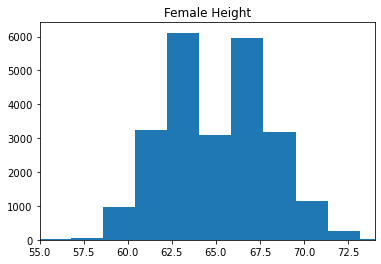

In [286]:
plt.hist(x = 'height', data = profiles[profiles['sex'] == 'f'], bins = 50)
plt.xlim(55, 74)
plt.title("Female Height")

Text(0.5, 1.0, 'Male Height')

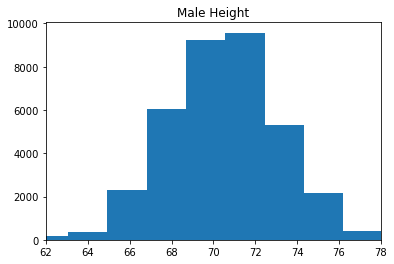

In [287]:
plt.hist(x = 'height', data = profiles[profiles['sex'] == 'm'], bins = 50)
plt.xlim(62, 78)
plt.title("Male Height")

In [288]:
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,City
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,south san francisco
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,oakland
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,san francisco
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,berkeley
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,san francisco


## Research Question

What changes does location have on a person's dating profile (in terms of pets, offspring goals, drugs, etc.)?

Can we develop an archetype for each sex's online dating profile by city?

First we must group by cities and set a cut off point for the number of data needed for each city

In [289]:
city_counts = profiles_filtered['City'].value_counts().head(20)

city_counts

san francisco          31060
oakland                 7213
berkeley                4211
san mateo               1331
palo alto               1064
alameda                  910
san rafael               755
hayward                  747
emeryville               738
redwood city             693
daly city                681
san leandro              651
walnut creek             643
vallejo                  558
menlo park               478
richmond                 424
south san francisco      416
mountain view            384
novato                   369
burlingame               361
Name: City, dtype: int64

We want to analyze the distribution of the quantitative variables for these 20 cities

In [290]:
top_cities = profiles_filtered[profiles_filtered['City'].isin(city_counts.index)]

print(len(profiles_filtered))
print(len(top_cities))
top_cities.head()

59936
53687


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,City
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,south san francisco
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,oakland
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,san francisco
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,berkeley
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,san francisco


Now we have our filtered dataset that contains all the rows we want. We have removed status' that are not important to us, 'unknown', and have removed the rows which are from the smaller cities. 

We can now begin discovering what variables are most important for each status class.

In [291]:
top_cities.groupby(['sex', 'orientation']).mean()

age     height        income
sex orientation                                    
f   bisexual     28.736288  65.304155  20021.359557
    gay          31.267165  65.124405  16389.358939
    straight     32.825992  65.101419   9966.366410
m   bisexual     30.670940  70.115385  37620.373219
    gay          32.528515  70.076741  12616.749540
    straight     31.874017  70.499094  27516.187108

In [292]:
# Testing to see if there is statistical significance between income and sexual orientation between males

import scipy.stats as stats

male_data = top_cities[top_cities['sex'] == 'm']

bisexual_males = male_data[male_data['orientation'] == 'bisexual']
gay_males = male_data[male_data['orientation'] == 'gay']
straight_males = male_data[male_data['orientation'] == 'straight']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(
    bisexual_males['income'],
    gay_males['income'],
    straight_males['income']
)

alpha = 0.05  # significance level

if p_value < alpha:
    print(f"There is a statistically significant difference in mean income among the three orientation groups for males with a p value of {p_value}")
else:
    print(f"There is no statistically significant difference in mean income among the three orientation groups for males with a p value of {p_value}")


There is a statistically significant difference in mean income among the three orientation groups for males with a p value of 1.3688787783710398e-15


/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='orientation', ylabel='income'>

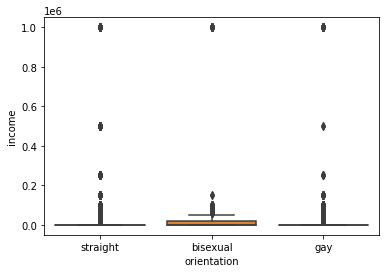

In [293]:
sns.boxplot(male_data['orientation'], male_data['income'])

There are some big outliers skewing the data

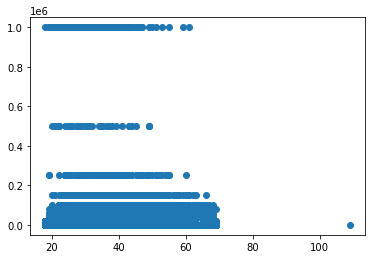

In [294]:
plt.scatter(male_data['age'], male_data['income'])

In [295]:
male_data['income'].head()

0       -1
1    80000
2       -1
3    20000
4       -1
Name: income, dtype: int64

In [296]:
male_data['income'].unique()

array([     -1,   80000,   20000,   40000,   60000,  150000,  100000,
        500000, 1000000,  250000,   30000,   50000,   70000])

Looks like there are different income categories

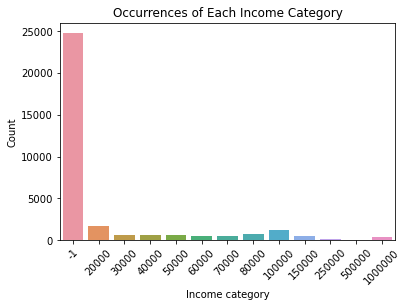

In [297]:
sns.countplot(data=male_data, x='income')
plt.xlabel('Income category')
plt.ylabel('Count')
plt.title('Occurrences of Each Income Category')
plt.xticks(rotation=45)
plt.show()

For some reason there is an income category of -1. This could represent missing data, i.e., the subject declined to disclose their actual income and when considering it can be a sensitive topic it would be reasonable to assume so. There also is no 'NA' type value field so this gives credence to the idea that -1 is NA.

In [298]:
male_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32090 entries, 0 to 59935
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          32090 non-null  int64  
 1   body_type    29739 non-null  object 
 2   diet         19125 non-null  object 
 3   drinks       30399 non-null  object 
 4   drugs        24160 non-null  object 
 5   education    28398 non-null  object 
 6   essay0       29293 non-null  object 
 7   essay1       28222 non-null  object 
 8   essay2       27003 non-null  object 
 9   essay3       25546 non-null  object 
 10  essay4       26480 non-null  object 
 11  essay5       25756 non-null  object 
 12  essay6       24853 non-null  object 
 13  essay7       25365 non-null  object 
 14  essay8       22064 non-null  object 
 15  essay9       25706 non-null  object 
 16  ethnicity    29129 non-null  object 
 17  height       32089 non-null  float64
 18  income       32090 non-null  int64  
 19  job 

In [299]:
# Filter for rows not containing -1 and redo analysis
male_income = male_data[male_data['income']!=-1]

print(len(male_income))
male_income.groupby(['orientation']).mean()

7313


,age,height,income
orientation,,,
bisexual,29.926471,70.200980,129460.784314
gay,32.601490,70.260708,89404.096834
straight,32.131315,70.546713,115489.957395


In [300]:
bisexual_males = male_income[male_income['orientation'] == 'bisexual']
gay_males = male_income[male_income['orientation'] == 'gay']
straight_males = male_income[male_income['orientation'] == 'straight']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(
    bisexual_males['income'],
    gay_males['income'],
    straight_males['income']
)

alpha = 0.05  # significance level

if p_value < alpha:
    print(f"There is a statistically significant difference in mean income among the three orientation groups for males with a p value of {p_value}")
else:
    print(f"There is no statistically significant difference in mean income among the three orientation groups for males with a p value of {p_value}")

There is a statistically significant difference in mean income among the three orientation groups for males with a p value of 0.011950600307681667


Here we removed the NA values from our income field and see that there are still significant differences between income for different sexual orientations among males although the p-value we obtain is less significant.

We can perform the same analysis for women and see if there are differences in income among different sexual oritentations

In [301]:
female_data = top_cities[top_cities['sex'] == 'f']
female_income = female_data[female_data['income']!= -1]

bisexual_f = female_income[female_income['orientation'] == 'bisexual']
gay_f = female_income[female_income['orientation'] == 'gay']
straight_f = female_income[female_income['orientation'] == 'straight']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(
    bisexual_f['income'],
    gay_f['income'],
    straight_f['income']
)

alpha = 0.05  # significance level

if p_value < alpha:
    print(f"There is a statistically significant difference in mean income among the three orientation groups for females with a p value of {p_value}")
else:
    print(f"There is no statistically significant difference in mean income among the three orientation groups for females with a p value of {p_value}")

There is no statistically significant difference in mean income among the three orientation groups for females with a p value of 0.12074575556940484


We find that there is no statistical difference for income among different sexual orientations for women

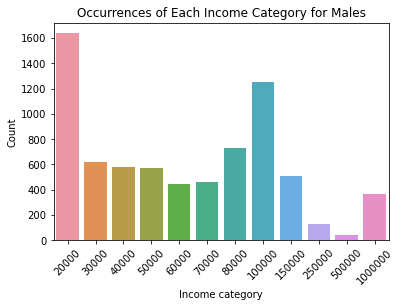

In [302]:
sns.countplot(data=male_income, x='income')
plt.xlabel('Income category')
plt.ylabel('Count')
plt.title('Occurrences of Each Income Category for Males')
plt.xticks(rotation=45)
plt.show()

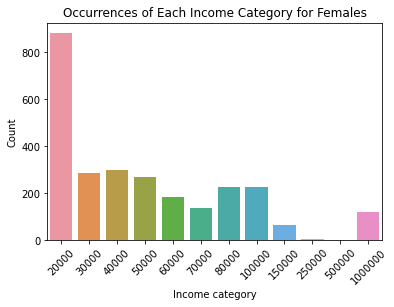

In [303]:
sns.countplot(data=female_income, x='income')
plt.xlabel('Income category')
plt.ylabel('Count')
plt.title('Occurrences of Each Income Category for Females')
plt.xticks(rotation=45)
plt.show()

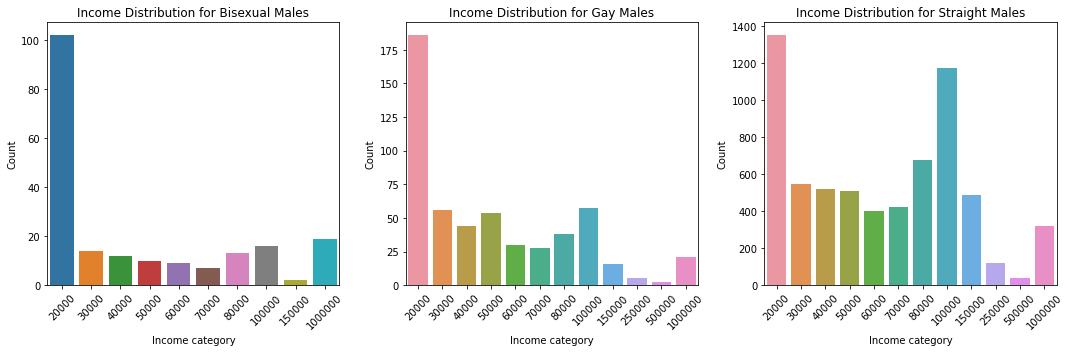

In [304]:
male_orientation = [bisexual_males, gay_males, straight_males]
orientation_names = ['Bisexual Males', 'Gay Males', 'Straight Males']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a 1x3 grid of subplots

for i, orientation in enumerate(male_orientation):
    sns.countplot(data=orientation, x='income', ax=axes[i])  # Specify the axes for each subplot
    axes[i].set_xlabel('Income category')
    axes[i].set_ylabel('Count')
    axes[i].set_title('Income Distribution for ' + orientation_names[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

In [305]:
top_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53687 entries, 0 to 59935
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          53687 non-null  int64  
 1   body_type    48839 non-null  object 
 2   diet         31872 non-null  object 
 3   drinks       51012 non-null  object 
 4   drugs        40662 non-null  object 
 5   education    47932 non-null  object 
 6   essay0       48826 non-null  object 
 7   essay1       46987 non-null  object 
 8   essay2       45170 non-null  object 
 9   essay3       43440 non-null  object 
 10  essay4       44431 non-null  object 
 11  essay5       44068 non-null  object 
 12  essay6       41492 non-null  object 
 13  essay7       42649 non-null  object 
 14  essay8       36567 non-null  object 
 15  essay9       42512 non-null  object 
 16  ethnicity    48525 non-null  object 
 17  height       53685 non-null  float64
 18  income       53687 non-null  int64  
 19  job 

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drugs', ylabel='count'>

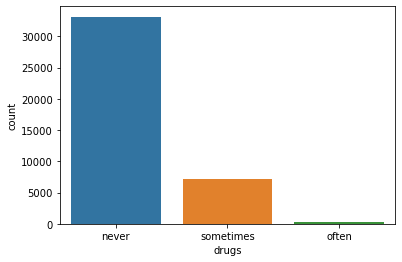

In [306]:
sns.countplot('drugs', data = top_cities)

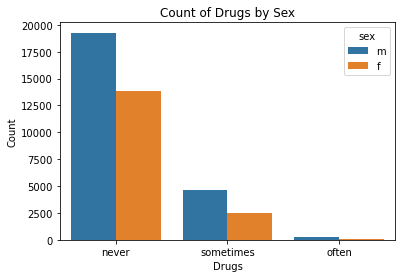

In [307]:
sns.countplot(x='drugs', hue='sex', data=top_cities)
plt.xlabel('Drugs')
plt.ylabel('Count')
plt.title('Count of Drugs by Sex')
plt.show()

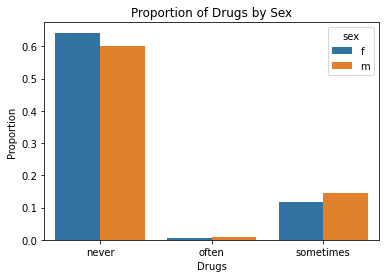

In [308]:
# Calculate the proportions
proportions = top_cities.groupby(['drugs', 'sex']).size() / top_cities.groupby(['sex']).size()

# Reset the index to convert the result to a DataFrame
proportions = proportions.reset_index(name='proportion')

# Plot the countplot with proportions
sns.barplot(x='drugs', y='proportion', hue='sex', data=proportions)
plt.xlabel('Drugs')
plt.ylabel('Proportion')
plt.title('Proportion of Drugs by Sex')
plt.show()

We find that males generally take more drugs than females but not by a significant margin

In [309]:
top_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53687 entries, 0 to 59935
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          53687 non-null  int64  
 1   body_type    48839 non-null  object 
 2   diet         31872 non-null  object 
 3   drinks       51012 non-null  object 
 4   drugs        40662 non-null  object 
 5   education    47932 non-null  object 
 6   essay0       48826 non-null  object 
 7   essay1       46987 non-null  object 
 8   essay2       45170 non-null  object 
 9   essay3       43440 non-null  object 
 10  essay4       44431 non-null  object 
 11  essay5       44068 non-null  object 
 12  essay6       41492 non-null  object 
 13  essay7       42649 non-null  object 
 14  essay8       36567 non-null  object 
 15  essay9       42512 non-null  object 
 16  ethnicity    48525 non-null  object 
 17  height       53685 non-null  float64
 18  income       53687 non-null  int64  
 19  job 

In [310]:
top_cities.groupby(['sex', 'body_type']).mean()

age     height         income
sex body_type                                          
f   a little extra  34.145401  65.099407   12818.176558
    athletic        33.220380  65.651390   12412.567040
    average         32.700903  64.923370    8620.986961
    curvy           31.908468  65.086464   11594.275194
    fit             34.175639  65.110891    8833.141900
    full figured    34.048257  65.769437   17707.012064
    jacked          27.967742  65.629032  120321.879032
    overweight      34.352941  65.504202    8234.521008
    rather not say  32.303030  64.343434    3029.414141
    skinny          28.034111  64.707361   18383.344704
    thin            31.850641  65.212108   11665.049050
    used up         26.628866  65.278351   63092.041237
m   a little extra  34.021401  70.481842   25842.372892
    athletic        31.545037  70.701485   28534.949658
    average         32.180792  70.074975   21249.240221
    curvy           30.941748  69.786408   82912.019417
    fit             32.655488  70.406151   26094.115986
    full figured    32.768000  71.168000   71359.400000
    jacked          31.281853  70.656371   78570.772201
    overweight      34.834646  70.665354   30275.055118
    rather not say  32.325581  70.593023   35464.383721
    skinny          27.676306  70.509328   24989.917910
    thin            30.888567  70.820550   24509.574530
    used up         29.112108  70.896861  109685.394619

In [311]:
top_cities.groupby(['sex', 'body_type']).size()

sex  body_type     
f    a little extra     674
     athletic          2051
     average           4985
     curvy             3354
     fit               4031
     full figured       746
     jacked             124
     overweight         119
     rather not say      99
     skinny             557
     thin              2263
     used up             97
m    a little extra    1542
     athletic          8482
     average           7976
     curvy              103
     fit               7544
     full figured       125
     jacked             259
     overweight         254
     rather not say      86
     skinny            1072
     thin              2073
     used up            223
dtype: int64

In [312]:
top_cities.groupby(['City']).mean()

,age,height,income
City,,,
alameda,34.238462,68.353846,17592.656044
berkeley,31.390406,68.327156,17367.972216
burlingame,33.315789,68.055402,20470.108033
daly city,30.079295,67.682819,19353.135095
emeryville,32.704607,68.452575,26706.550136
hayward,30.599732,68.175368,16732.842035
menlo park,34.223849,68.573222,18534.721757
mountain view,30.755208,68.588542,19738.786458
novato,36.563686,68.536585,20893.601626


In [313]:
top_cities.offspring.head()

0    doesn&rsquo;t have kids, but might want them
1    doesn&rsquo;t have kids, but might want them
2                                             NaN
3                         doesn&rsquo;t want kids
4                                             NaN
Name: offspring, dtype: object

In [314]:
top_cities.offspring.unique()

array(['doesn&rsquo;t have kids, but might want them', nan,
       'doesn&rsquo;t want kids',
       'doesn&rsquo;t have kids, but wants them',
       'doesn&rsquo;t have kids', 'wants kids', 'has kids', 'has a kid',
       'doesn&rsquo;t have kids, and doesn&rsquo;t want any',
       'has kids, but doesn&rsquo;t want more',
       'has a kid, but doesn&rsquo;t want more',
       'has a kid, and wants more', 'has kids, and might want more',
       'might want kids', 'has a kid, and might want more',
       'has kids, and wants more'], dtype=object)

In [315]:
top_cities.offspring.value_counts()

doesn&rsquo;t have kids                                6876
doesn&rsquo;t have kids, but might want them           3507
doesn&rsquo;t have kids, but wants them                3168
doesn&rsquo;t want kids                                2647
has a kid                                              1492
has kids                                               1395
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1010
has kids, but doesn&rsquo;t want more                   327
has a kid, but doesn&rsquo;t want more                  213
wants kids                                              200
has a kid, and might want more                          192
might want kids                                         165
has kids, and might want more                            90
has a kid, and wants more                                55
has kids, and wants more                                 14
Name: offspring, dtype: int64

We can try and group these different answers into distinct classes, maybe 3 or 4 different general answers. It would be beneficial to do this so as to aggregate these into more general buckets so we can perform better and more efficient analysis on them.

They can be:
1. Has kids
2. Doesn't have kids
3. Wants kids
4. Doesn't want kids

In [316]:
# Aggregate offspring classes and clean up the names
replacement_dict = {
    "doesn&rsquo;t have kids, but might want them": "No kids but wants",
    "doesn&rsquo;t have kids, but wants them": "No kids but wants",
    "might want kids": "No kids but wants",
    "doesn&rsquo;t have kids": "No kids",
    "doesn&rsquo;t want kids": "Doesn't want kids",
    "doesn&rsquo;t have kids, and doesn&rsquo;t want any": "Doesn't want kids",
    "has a kid": "Has kids",
    "has kids": "Has kids",
    "has kids, but doesn&rsquo;t want more": "Has kids, doesn't want more",
    "has a kid, but doesn&rsquo;t want more": "Has kids, doesn't want more",
    "wants kids": "No kids but wants",
    "has a kid, and might want more": "Has kids, wants more",
    "has kids, and might want more": "Has kids, wants more",
    "has a kid, and wants more": "Has kids, wants more",
    "has kids, and wants more": "Has kids, wants more"
}

top_cities['offspring'] = top_cities['offspring'].replace(replacement_dict)

top_cities.offspring.value_counts()

<ipython-input-316-b587778785fe>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cities['offspring'] = top_cities['offspring'].replace(replacement_dict)


No kids but wants              7040
No kids                        6876
Doesn't want kids              3657
Has kids                       2887
Has kids, doesn't want more     540
Has kids, wants more            351
Name: offspring, dtype: int64

Our data frame now has 6 unique values for 'offspring'

In [317]:
top_cities.groupby(['sex', 'offspring']).size()

sex  offspring                  
f    Doesn't want kids              1516
     Has kids                       1433
     Has kids, doesn't want more     317
     Has kids, wants more            132
     No kids                        2853
     No kids but wants              3206
m    Doesn't want kids              2141
     Has kids                       1454
     Has kids, doesn't want more     223
     Has kids, wants more            219
     No kids                        4023
     No kids but wants              3834
dtype: int64

In [319]:
top_cities.groupby(['sex', 'offspring']).mean()

age     height        income
sex offspring                                                      
f   Doesn't want kids            34.558047  65.284301  23983.392480
    Has kids                     45.350314  64.989532  12637.000698
    Has kids, doesn't want more  48.820189  65.000000  14068.589905
    Has kids, wants more         33.545455  65.022727  11741.696970
    No kids                      30.608132  65.077813  11723.600421
    No kids but wants            30.298503  65.205864  10370.330630
m   Doesn't want kids            34.065857  70.529659  37734.034096
    Has kids                     44.982806  70.526135  32207.039890
    Has kids, doesn't want more  48.995516  70.493274  33766.152466
    Has kids, wants more         37.191781  70.570776  59634.155251
    No kids                      29.941586  70.575833  22803.080040
    No kids but wants            31.001043  70.531560  28556.943662

once all of our data is cleaned and variables chosen we can perform PCA analysis and find distinct groups in this dataset, there seems to be an older crowd which has kids and doesn't want any more.

In [320]:
top_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53687 entries, 0 to 59935
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          53687 non-null  int64  
 1   body_type    48839 non-null  object 
 2   diet         31872 non-null  object 
 3   drinks       51012 non-null  object 
 4   drugs        40662 non-null  object 
 5   education    47932 non-null  object 
 6   essay0       48826 non-null  object 
 7   essay1       46987 non-null  object 
 8   essay2       45170 non-null  object 
 9   essay3       43440 non-null  object 
 10  essay4       44431 non-null  object 
 11  essay5       44068 non-null  object 
 12  essay6       41492 non-null  object 
 13  essay7       42649 non-null  object 
 14  essay8       36567 non-null  object 
 15  essay9       42512 non-null  object 
 16  ethnicity    48525 non-null  object 
 17  height       53685 non-null  float64
 18  income       53687 non-null  int64  
 19  job 

In [322]:
top_cities.groupby(['orientation', 'offspring']).size()

orientation  offspring                  
bisexual     Doesn't want kids               444
             Has kids                        122
             Has kids, doesn't want more      16
             Has kids, wants more             17
             No kids                         229
             No kids but wants               255
gay          Doesn't want kids               631
             Has kids                        100
             Has kids, doesn't want more      10
             Has kids, wants more              7
             No kids                         298
             No kids but wants               414
straight     Doesn't want kids              2582
             Has kids                       2665
             Has kids, doesn't want more     514
             Has kids, wants more            327
             No kids                        6349
             No kids but wants              6371
dtype: int64

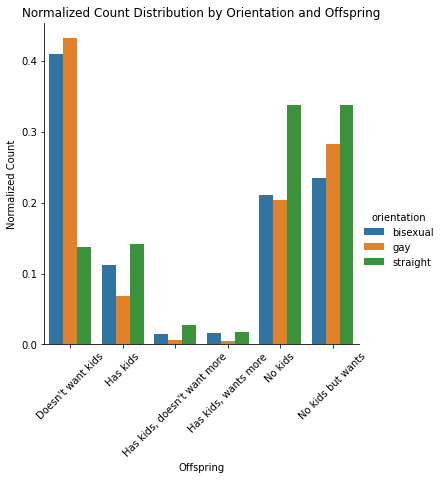

In [326]:
count_values = top_cities.groupby(['orientation', 'offspring']).size()

# Convert the count values to a DataFrame
count_df = count_values.reset_index(name='count')

# Calculate the sum of counts for each orientation
sum_counts = count_df.groupby('orientation')['count'].transform('sum')

# Normalize the count values
count_df['normalized_count'] = count_df['count'] / sum_counts

# Plot the normalized count distribution
sns.catplot(data=count_df, x='offspring', y='normalized_count', hue='orientation', kind='bar')
plt.xlabel('Offspring')
plt.ylabel('Normalized Count')
plt.title('Normalized Count Distribution by Orientation and Offspring')
plt.xticks(rotation=45)
plt.show()

We can see that the bisexual and gay orientations don't want kids as comapared with the straight oriented people in our dataset